In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("C:/Users/gauri/Downloads/archive (11)/Stress.csv")
df.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


In [4]:
df.describe()

,label,confidence,social_timestamp
count,2838.000000,2838.000000,2.838000e+03
mean,0.524313,0.808972,1.518107e+09
std,0.499497,0.177038,1.552209e+07
min,0.000000,0.428571,1.483274e+09
25%,0.000000,0.600000,1.509698e+09
50%,1.000000,0.800000,1.517066e+09
75%,1.000000,1.000000,1.530898e+09
max,1.000000,1.000000,1.542592e+09


In [5]:
df.isnull()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2833,False,False,False,False,False,False,False
2834,False,False,False,False,False,False,False
2835,False,False,False,False,False,False,False
2836,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

subreddit           0
post_id             0
sentence_range      0
text                0
label               0
confidence          0
social_timestamp    0
dtype: int64

In [7]:
import nltk
import re
from nltk. corpus import stopwords
import string
nltk. download( 'stopwords' )
stemmer = nltk. SnowballStemmer("english")
stopword=set (stopwords . words ( 'english' ))
def clean(text):
    text = str(text) . lower()  #returns a string where all characters are lower case. Symbols and Numbers are ignored.
    text = re. sub('\[.*?\]',' ',text)  #substring and returns a string with replaced values.
    text = re. sub('https?://\S+/www\. \S+', ' ', text)#whitespace char with pattern
    text = re. sub('<. *?>+', ' ', text)#special char enclosed in square brackets
    text = re. sub(' [%s]' % re. escape(string. punctuation), ' ', text)#eliminate punctuation from string
    text = re. sub(' \n',' ', text)
    text = re. sub(' \w*\d\w*' ,' ', text)#word character ASCII punctuation
    text = [word for word in text. split(' ') if word not in stopword]  #removing stopwords
    text =" ". join(text)
    text = [stemmer . stem(word) for word in text. split(' ') ]#remove morphological affixes from words
    text = " ". join(text)
    return text
df [ "text"] = df["text"]. apply(clean)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gauri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


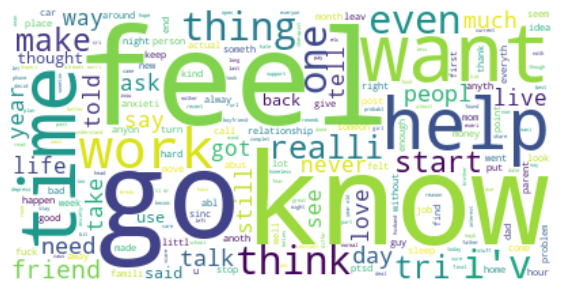

In [18]:
import matplotlib. pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ". join(i for i in df. text)
stopwords = set (STOPWORDS)
wordcloud = WordCloud( stopwords=stopwords,background_color="white") . generate(text)
plt. figure(figsize=(7, 5) )
plt. imshow(wordcloud, interpolation='bilinear' )
plt. axis("off")
plt. show( )


In [11]:
from sklearn. feature_extraction. text import CountVectorizer
from sklearn. model_selection import train_test_split
x = np.array (df["text"])
y = np.array (df["label"])
cv = CountVectorizer ()
X = cv. fit_transform(x)
print(X)
xtrain, xtest, ytrain, ytest = train_test_split(X, y,test_size=0.33,random_state=42)


  (0, 7405)	1
  (0, 3278)	1
  (0, 9454)	1
  (0, 861)	1
  (0, 8359)	1
  (0, 3750)	1
  (0, 7214)	1
  (0, 8908)	1
  (0, 298)	1
  (0, 9749)	1
  (0, 4303)	1
  (0, 5034)	1
  (0, 5325)	1
  (0, 2188)	1
  (0, 5118)	1
  (0, 3265)	1
  (0, 2593)	3
  (0, 4188)	1
  (0, 5316)	1
  (0, 3697)	1
  (0, 8339)	1
  (0, 6861)	1
  (0, 4150)	1
  (0, 5174)	1
  (0, 1831)	1
  :	:
  (2836, 877)	1
  (2836, 4555)	1
  (2836, 2928)	1
  (2836, 4615)	1
  (2836, 4785)	1
  (2836, 4511)	1
  (2837, 7405)	2
  (2837, 3018)	1
  (2837, 5533)	2
  (2837, 8784)	1
  (2837, 8502)	1
  (2837, 6770)	1
  (2837, 4318)	1
  (2837, 9670)	1
  (2837, 5569)	1
  (2837, 8881)	1
  (2837, 5713)	1
  (2837, 2587)	1
  (2837, 7468)	1
  (2837, 2351)	1
  (2837, 7804)	1
  (2837, 2758)	1
  (2837, 8880)	1
  (2837, 5459)	1
  (2837, 3020)	1


In [12]:
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB()
model.fit(xtrain,ytrain)




BernoulliNB()

In [16]:
# In[26]:
user=input("Enter the text  ")
data=cv.transform([user]).toarray()
output=model.predict(data)
print(output)



Enter the text  I am happy
[0]


In [14]:
# In[26]:
user=input("Enter the text  ")
data=cv.transform([user]).toarray()
output=model.predict(data)
print(output)


Enter the text  I am sad
[1]
